# Assignment 2 

# Business Problem: Predicting Used Car Resale Prices


# Take into consideration -car's age, mileage, brand, fuel type etc

# Objective :  To provide dealer to price competitively and provide customers with Exact Quote (Target Data : Resale Price)

In [97]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score




In [2]:
# Load Data
data = pd.read_csv('used_car_prices_dataset_final.csv')
data

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.725266,Honda,Electric,Manual,3.0,1.858776,116.781923,Poor,37380.232721
1,11,72118.008487,Honda,Electric,Automatic,4.0,2.464409,150.064915,Fair,58279.184367
2,8,38721.050239,Ford,Hybrid,Manual,2.0,1.666394,140.577568,Fair,52420.515613
3,7,33675.655109,Kia,Petrol,Automatic,3.0,2.799322,157.020208,Poor,54195.804720
4,19,51562.861259,Mercedes,Petrol,Automatic,4.0,2.423886,196.907490,Fair,57287.511089
...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.582928,Audi,Hybrid,Manual,2.0,1.839159,170.177585,Fair,56808.958580
4662,4,66193.150603,Hyundai,Diesel,Automatic,4.0,1.838883,162.177454,Poor,56224.633133
4663,1,54614.234981,Ford,Electric,Automatic,2.0,2.478123,178.078306,Excellent,68440.018358
4664,7,52035.766674,Toyota,Hybrid,Manual,4.0,1.629055,191.210803,Excellent,64847.894059


# Understanding the data

In [3]:
data.shape

(4666, 10)

# There are 10 Columns and 4666 Rows

In [4]:
data.columns

Index(['CarAge', 'Mileage', 'Brand', 'FuelType', 'Transmission', 'OwnerCount',
       'EngineSize', 'Horsepower', 'CarCondition', 'ResalePrice'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CarAge        4666 non-null   int64  
 1   Mileage       4666 non-null   float64
 2   Brand         4666 non-null   object 
 3   FuelType      4666 non-null   object 
 4   Transmission  4666 non-null   object 
 5   OwnerCount    4533 non-null   float64
 6   EngineSize    4666 non-null   float64
 7   Horsepower    4666 non-null   float64
 8   CarCondition  4666 non-null   object 
 9   ResalePrice   4666 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 364.7+ KB


In [6]:
data.dtypes

CarAge            int64
Mileage         float64
Brand            object
FuelType         object
Transmission     object
OwnerCount      float64
EngineSize      float64
Horsepower      float64
CarCondition     object
ResalePrice     float64
dtype: object

In [7]:
data.head()

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.725266,Honda,Electric,Manual,3.0,1.858776,116.781923,Poor,37380.232721
1,11,72118.008487,Honda,Electric,Automatic,4.0,2.464409,150.064915,Fair,58279.184367
2,8,38721.050239,Ford,Hybrid,Manual,2.0,1.666394,140.577568,Fair,52420.515613
3,7,33675.655109,Kia,Petrol,Automatic,3.0,2.799322,157.020208,Poor,54195.804720
4,19,51562.861259,Mercedes,Petrol,Automatic,4.0,2.423886,196.907490,Fair,57287.511089


In [8]:
data.tail()

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
4661,4,22710.582928,Audi,Hybrid,Manual,2.0,1.839159,170.177585,Fair,56808.958580
4662,4,66193.150603,Hyundai,Diesel,Automatic,4.0,1.838883,162.177454,Poor,56224.633133
4663,1,54614.234981,Ford,Electric,Automatic,2.0,2.478123,178.078306,Excellent,68440.018358
4664,7,52035.766674,Toyota,Hybrid,Manual,4.0,1.629055,191.210803,Excellent,64847.894059
4665,18,56126.950679,Toyota,Petrol,Manual,1.0,0.988205,173.368420,Fair,43329.185500


In [210]:
data.describe()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
count,4666.000000,4666.000000,4533.000000,4666.000000,4666.000000,4666.000000
mean,10.272396,51426.427843,2.481800,2.038584,149.847050,52181.774725
std,5.941061,24202.419914,1.135924,0.578350,39.985538,12106.945975
min,1.000000,-26733.110969,1.000000,-0.239261,-28.617994,-599.850702
25%,5.000000,36405.518638,1.000000,1.670417,122.888099,44039.237132
50%,10.000000,49959.169302,2.000000,2.020539,149.576750,52222.640637
75%,15.000000,64324.464932,4.000000,2.361428,176.628790,60278.028717
max,30.000000,150000.000000,4.000000,5.000000,291.701613,94400.286774


In [9]:
#  Duplication Check
data.duplicated().sum()

0

In [10]:
#  Null Check
data.isnull().sum()

CarAge            0
Mileage           0
Brand             0
FuelType          0
Transmission      0
OwnerCount      133
EngineSize        0
Horsepower        0
CarCondition      0
ResalePrice       0
dtype: int64

In [11]:
#  count values - grouped by Brand
data['Brand'].value_counts()

Brand
Ford        540
BMW         529
Toyota      527
Kia         522
Hyundai     522
Mercedes    519
Audi        514
Honda       504
Nissan      489
Name: count, dtype: int64

In [18]:
# Owner Count - column only  has null values
# impute ull values based on data
data.describe()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
count,4666.000000,4666.000000,4666.000000,4666.000000,4666.000000,4666.000000
mean,10.272396,51426.427843,2.468067,2.038584,149.847050,52181.774725
std,5.941061,24202.419914,1.122482,0.578350,39.985538,12106.945975
min,1.000000,-26733.110969,1.000000,-0.239261,-28.617994,-599.850702
25%,5.000000,36405.518638,1.000000,1.670417,122.888099,44039.237132
50%,10.000000,49959.169302,2.000000,2.020539,149.576750,52222.640637
75%,15.000000,64324.464932,3.000000,2.361428,176.628790,60278.028717
max,30.000000,150000.000000,4.000000,5.000000,291.701613,94400.286774


In [55]:
# removing mileage
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_cutoff  = q1-1.5*iqr
    upper_cutoff = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] >= lower_cutoff) & (df_in[col_name] <= upper_cutoff)]
    return df_out
     
     

In [68]:
#outliers Removed
data = remove_outlier(data ,'Mileage')
data =data[data['Mileage'] >0 ]
data.describe()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
count,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000
mean,10.159675,49825.532658,2.472034,2.002512,149.844800,52265.898960
std,5.800483,19463.585365,1.122643,0.484313,38.504853,11685.348136
min,1.000000,38.779650,1.000000,0.634685,43.520139,8608.948468
25%,5.000000,36507.039190,1.000000,1.660786,123.129852,44224.283126
50%,10.000000,49568.984733,2.000000,2.010353,149.419836,52217.260757
75%,15.000000,63645.429181,3.000000,2.341682,176.479552,60119.864438
max,30.000000,104215.885981,4.000000,3.359956,257.036029,94400.286774


In [14]:
data['OwnerCount'].isnull().value_counts()
data_temp = data.copy()

In [28]:
# Imputing Null values with mean
mean_value = data['OwnerCount'].mean().round()
mean_value

2.0

In [29]:
data_temp['OwnerCount'].fillna(value=mean_value, inplace=True) 
data['OwnerCount'].fillna(value=mean_value, inplace=True) 

In [17]:
data_temp.isnull().value_counts()

CarAge  Mileage  Brand  FuelType  Transmission  OwnerCount  EngineSize  Horsepower  CarCondition  ResalePrice
False   False    False  False     False         False       False       False       False         False          4666
Name: count, dtype: int64

In [69]:
# Removing Outliers
data.describe()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
count,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000
mean,10.159675,49825.532658,2.472034,2.002512,149.844800,52265.898960
std,5.800483,19463.585365,1.122643,0.484313,38.504853,11685.348136
min,1.000000,38.779650,1.000000,0.634685,43.520139,8608.948468
25%,5.000000,36507.039190,1.000000,1.660786,123.129852,44224.283126
50%,10.000000,49568.984733,2.000000,2.010353,149.419836,52217.260757
75%,15.000000,63645.429181,3.000000,2.341682,176.479552,60119.864438
max,30.000000,104215.885981,4.000000,3.359956,257.036029,94400.286774


CarAge


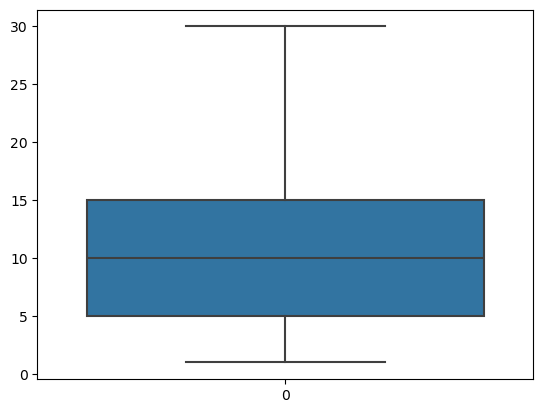

Mileage


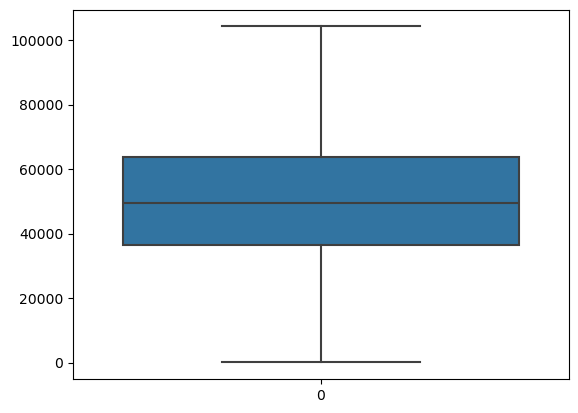

OwnerCount


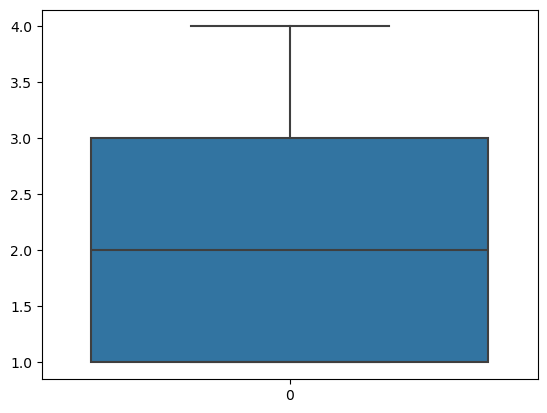

EngineSize


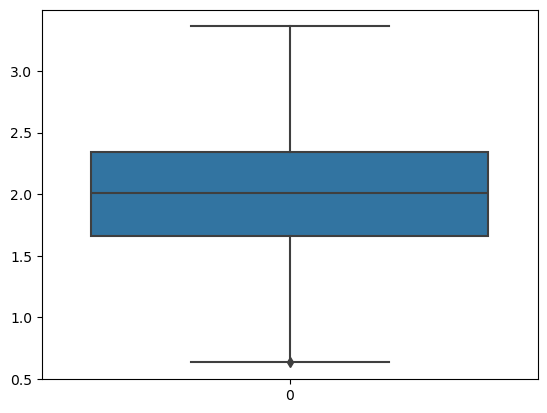

Horsepower


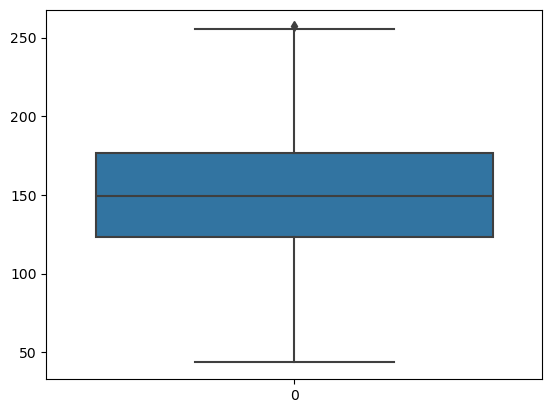

ResalePrice


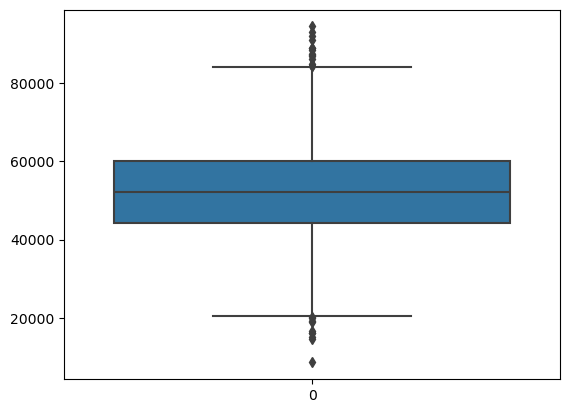

In [70]:
#finding Outliers
datahyundai = data[data['Brand'] == 'Hyundai' ]
num_col = datahyundai.select_dtypes(include='number').columns
for col in num_col :
    print (col)
    sns.boxplot(data[col])
    plt.show()
    


In [122]:
data[num_col].corr()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
CarAge,1.000000,0.061936,0.011832,0.027316,0.009051,-0.477215
Mileage,0.061936,1.000000,0.008324,0.055866,-0.000176,-0.210357
OwnerCount,0.011832,0.008324,1.000000,-0.011464,0.016059,0.017512
EngineSize,0.027316,0.055866,-0.011464,1.000000,-0.011504,0.204210
Horsepower,0.009051,-0.000176,0.016059,-0.011504,1.000000,0.654101
ResalePrice,-0.477215,-0.210357,0.017512,0.204210,0.654101,1.000000


<Axes: >

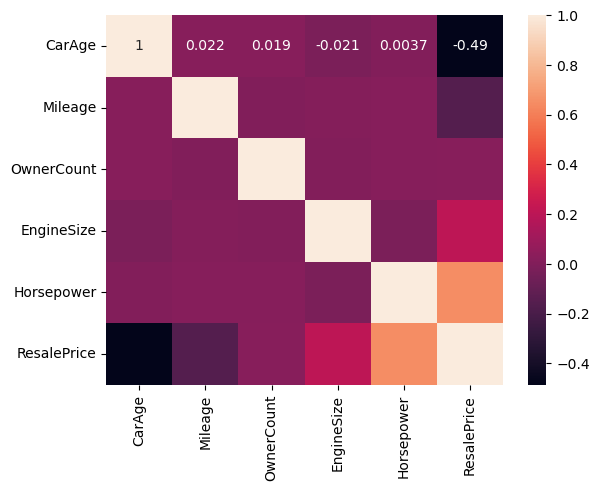

In [71]:
sns.heatmap(data[num_col].corr(), annot = True)

# Encoding

In [72]:
data['CarCondition'].value_counts()

CarCondition
Fair         1138
Excellent    1133
Poor         1091
Good         1072
Name: count, dtype: int64

In [73]:
map_car_condition = {'Poor' : 1 , 'Fair' : 2, 'Good' :3, 'Excellent' : 4 }
data_temp['CarCondition'] = data['CarCondition'].map(map_car_condition)
data_temp['CarCondition'].value_counts()

CarCondition
2.0    1138
4.0    1133
1.0    1091
3.0    1072
Name: count, dtype: int64

In [74]:
data = pd.get_dummies(data, columns = ['Brand' ,'Transmission','FuelType'] ,dtype ='int' )
map_car_condition = {'Poor' : 1 , 'Fair' : 2, 'Good' :3, 'Excellent' : 4 }
data['CarCondition'] = data['CarCondition'].map(map_car_condition)
data['CarCondition'].value_counts()
data

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice,Brand_Audi,Brand_BMW,Brand_Ford,...,Brand_Kia,Brand_Mercedes,Brand_Nissan,Brand_Toyota,Transmission_Automatic,Transmission_Manual,FuelType_Diesel,FuelType_Electric,FuelType_Hybrid,FuelType_Petrol
0,15,70539.725266,3.0,1.858776,116.781923,1,37380.232721,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,11,72118.008487,4.0,2.464409,150.064915,2,58279.184367,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,8,38721.050239,2.0,1.666394,140.577568,2,52420.515613,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,7,33675.655109,3.0,2.799322,157.020208,1,54195.804720,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,19,51562.861259,4.0,2.423886,196.907490,2,57287.511089,0,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.582928,2.0,1.839159,170.177585,2,56808.958580,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4662,4,66193.150603,4.0,1.838883,162.177454,1,56224.633133,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4663,1,54614.234981,2.0,2.478123,178.078306,4,68440.018358,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4664,7,52035.766674,4.0,1.629055,191.210803,4,64847.894059,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [75]:
scaling = StandardScaler()
X = data.drop(columns='ResalePrice')


In [76]:
X.columns

Index(['CarAge', 'Mileage', 'OwnerCount', 'EngineSize', 'Horsepower',
       'CarCondition', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_Kia', 'Brand_Mercedes', 'Brand_Nissan',
       'Brand_Toyota', 'Transmission_Automatic', 'Transmission_Manual',
       'FuelType_Diesel', 'FuelType_Electric', 'FuelType_Hybrid',
       'FuelType_Petrol'],
      dtype='object')

In [86]:
scaled_features = X.columns


In [87]:
data[scaled_features] = scaling.fit_transform(data[scaled_features])


In [88]:
data.corr()


,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice,Brand_Audi,Brand_BMW,Brand_Ford,...,Brand_Kia,Brand_Mercedes,Brand_Nissan,Brand_Toyota,Transmission_Automatic,Transmission_Manual,FuelType_Diesel,FuelType_Electric,FuelType_Hybrid,FuelType_Petrol
CarAge,1.000000,0.022193,0.019288,-0.021175,0.003730,0.033459,-0.486181,-0.015434,-0.017191,0.011115,...,-0.013950,-0.024583,0.007583,0.013669,0.006128,-0.006128,-0.001300,-0.020398,0.000801,0.021013
Mileage,0.022193,1.000000,-0.003084,0.012680,0.015346,0.014456,-0.156893,-0.009426,-0.011406,0.018517,...,-0.002274,0.008570,-0.013309,-0.009628,0.001355,-0.001355,-0.008394,0.015276,-0.011588,0.004989
OwnerCount,0.019288,-0.003084,1.000000,0.006562,0.017368,0.021240,0.019433,0.013291,-0.000011,0.000339,...,-0.024383,0.011360,-0.002292,-0.005819,0.008705,-0.008705,-0.014148,-0.004003,0.009981,0.008458
EngineSize,-0.021175,0.012680,0.006562,1.000000,-0.015947,0.013067,0.209364,0.016404,-0.007828,-0.006523,...,-0.000629,0.003429,0.022776,-0.009408,-0.001944,0.001944,-0.000400,0.009180,-0.002287,-0.006499
Horsepower,0.003730,0.015346,0.017368,-0.015947,1.000000,0.003321,0.650129,0.014219,0.007844,0.015375,...,0.006669,-0.020641,-0.025554,-0.012186,-0.016880,0.016880,-0.008263,-0.008415,-0.001165,0.018113
CarCondition,0.033459,0.014456,0.021240,0.013067,0.003321,1.000000,0.124015,0.024113,-0.014894,-0.014726,...,-0.004061,0.004279,-0.010946,-0.000867,0.006328,-0.006328,-0.019405,0.017622,-0.015819,0.018215
ResalePrice,-0.486181,-0.156893,0.019433,0.209364,0.650129,0.124015,1.000000,0.024044,0.012625,0.005808,...,0.021764,-0.010377,-0.009603,-0.022230,-0.001505,0.001505,0.003879,0.001862,-0.003154,-0.002665
Brand_Audi,-0.015434,-0.009426,0.013291,0.016404,0.014219,0.024113,0.024044,1.000000,-0.126236,-0.129064,...,-0.125381,-0.125095,-0.121200,-0.125666,-0.000943,0.000943,-0.020486,-0.007023,0.023907,0.003921
Brand_BMW,-0.017191,-0.011406,-0.000011,-0.007828,0.007844,-0.014894,0.012625,-0.126236,1.000000,-0.129945,...,-0.126236,-0.125948,-0.122026,-0.126523,0.010529,-0.010529,-0.013204,0.013772,-0.001739,0.001482
Brand_Ford,0.011115,0.018517,0.000339,-0.006523,0.015375,-0.014726,0.005808,-0.129064,-0.129945,1.000000,...,-0.129064,-0.128770,-0.124761,-0.129358,-0.002077,0.002077,0.007344,-0.009115,0.003142,-0.001561


In [89]:
X = data.drop(columns = 'ResalePrice')
y = data['ResalePrice']

# Data Split


In [93]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=31)

# Model

In [91]:
model = LinearRegression()


In [99]:
model.fit(train_X, train_y)

LinearRegression()

In [100]:
model.coef_

array([-5.72124485e+03, -1.81347692e+03,  1.00242832e+02,  2.47971725e+03,
        7.69815176e+03,  1.55138138e+03,  1.16725032e+16,  1.17342300e+16,
        1.19361563e+16,  1.14946203e+16,  1.16931389e+16,  1.16725032e+16,
        1.16518069e+16,  1.13663086e+16,  1.16931389e+16,  4.39097547e+15,
        4.39097547e+15, -4.13970713e+15, -4.04964454e+15, -4.07568946e+15,
       -4.03191407e+15])

<Axes: >

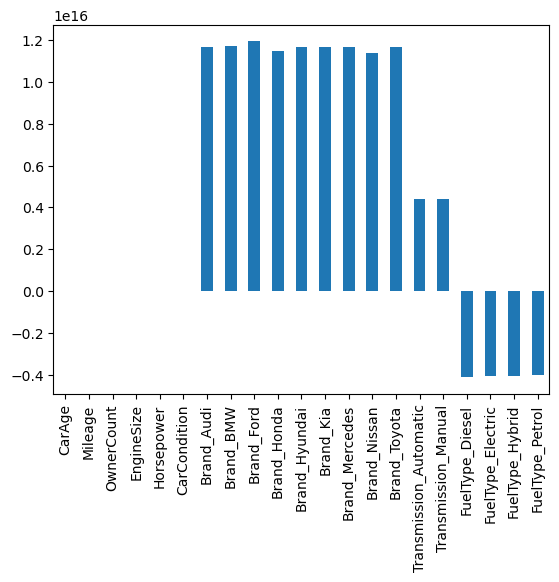

In [101]:
pd.Series(model.coef_, index = X.columns).plot(kind = 'bar')

In [102]:
model.intercept_

52257.411001193075

In [103]:
# Prediction
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

# Evaluvation

In [107]:
def evaluate(actual, pred, source):
    print(source)
    print("MSE")
    print(mean_squared_error(actual, pred))
    print("RMSE")
    print(np.sqrt(mean_squared_error(actual, pred)))
    print("MAPE")
    print(mean_absolute_percentage_error(actual, pred)) 
    print("R2 score")
    print(r2_score(actual, pred)) 
    return [mean_squared_error(actual, pred), np.sqrt(mean_squared_error(actual, pred)), r2_score(actual, pred), mean_absolute_percentage_error(actual, pred)]

In [106]:
train_result = evaluate(train_y, train_pred, 'TRAIN DATA RESULT')
test_result = evaluate(test_y, test_pred, 'TEST DATA RESULT')

TRAIN DATA RESULT
MSE
33747825.57973832
RMSE
5809.287871997592
MAPE
0.09397881693087409
R2 score
0.7514032554831578
TEST DATA RESULT
MSE
35261161.40896094
RMSE
5938.11092932432
MAPE
0.09765451984868609
R2 score
0.744904730987624


In [116]:
train_result

[33747825.57973832, 5809.287871997592, 0.7514032554831578, 0.09397881693087409]

In [115]:
test_result

[35261161.40896094, 5938.11092932432, 0.744904730987624, 0.09765451984868609]

In [117]:
result = [train_result] + [test_result]
print(result)

[[33747825.57973832, 5809.287871997592, 0.7514032554831578, 0.09397881693087409], [35261161.40896094, 5938.11092932432, 0.744904730987624, 0.09765451984868609]]


In [118]:
pd.DataFrame(result, columns=['MSE','RMSE','R2 Score','MAPE'], index = ['Train', 'Test'])

,MSE,RMSE,R2 Score,MAPE
Train,3.374783e+07,5809.287872,0.751403,0.093979
Test,3.526116e+07,5938.110929,0.744905,0.097655
